# Thyroid Prediction

In [189]:
# Iporting Required Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [204]:
# Reading File
df = pd.read_csv("C://Users//admin//Desktop//Thyriod Detection//hypothyroid.csv")

In [191]:
# First 5 Records
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,negative


In [192]:
# Count of Rows and Columns
df.shape 

(3770, 29)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3770 non-null   object
 1   sex                        3770 non-null   object
 2   on_thyroxine               3770 non-null   object
 3   query_on_thyroxine         3770 non-null   object
 4   on_antithyroid_medication  3770 non-null   object
 5   sick                       3770 non-null   object
 6   pregnant                   3770 non-null   object
 7   thyroid_surgery            3770 non-null   object
 8   I131_treatment             3770 non-null   object
 9   query_hypothyroid          3770 non-null   object
 10  query_hyperthyroid         3770 non-null   object
 11  lithium                    3770 non-null   object
 12  goitre                     3770 non-null   object
 13  tumor                      3770 non-null   object
 14  hypopitu

In [194]:
# Statistical Summary of Dataset

df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,Class
count,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770,3770
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,2
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,negative
freq,95,2479,3306,3720,3727,3623,3717,3717,3711,3537,3533,3752,3736,3674,3769,3586,3401,369,3001,769,3539,231,3384,386,3386,384,3770,3770,3481


#### Handling Missing Data

In [195]:
# Checking Null Values

df.isnull().sum().sum()

0

In [205]:
# Finding count of "?" in all columns

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 386
FTI 384
TBG 3770


These columns have NAN values.

NAN values are represted by "?" in our Dataset

In [206]:
# Convering "?" with NAN values

for i in df.columns:
    count = df[i][df[i]=='?'].count()
    if count>0:
        df[i] = df[i].replace('?' , np.nan)


In [198]:
# Checking NAN values

df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           386
FTI_measured                    0
FTI                           384
TBG_measured                    0
TBG                          3770
Class                           0
dtype: int64

In [207]:
# These columns are not required since they are increasing data redumdancy

df = df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

# Dropping TBG feature because all records are NULL in that feature

df = df.drop('TBG' , axis = 1)

In [201]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          386
FTI                          384
Class                          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189DA5AD7C8>,
      dtype=object)

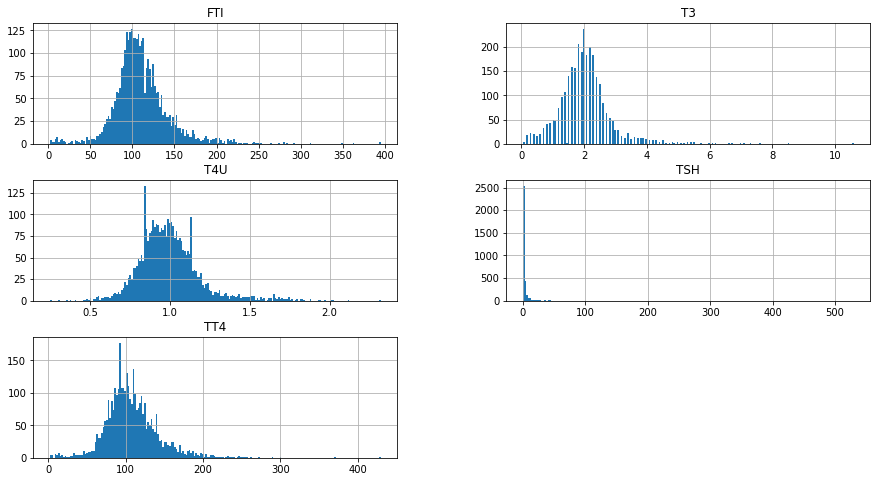

In [208]:
# Analysing distribution of Continious columns which contains NAN values.

df[['TSH','T3','TT4','T4U','FTI']]=df[['TSH','T3','TT4','T4U','FTI']].astype(float) # convering Object Dtype to Float
df[['TSH','T3','TT4','T4U','FTI']].hist(figsize = (15 , 8) , bins =200)

If data is normally distributed, we will replace NAN values with 'Mean'

But if data is skwed, NAN values will be replaced with 'Median'

In [211]:
# Replacing NAN values with Mean since the data normal

df['TSH'] = df['TSH'].replace(np.nan , df['TSH'].mean())
df['T3'] = df['T3'].replace(np.nan , df['T3'].mean())
df['TT4'] = df['TT4'].replace(np.nan , df['TT4'].mean())
df['T4U'] = df['T4U'].replace(np.nan , df['T4U'].mean())
df['FTI'] = df['FTI'].replace(np.nan , df['FTI'].mean())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000189DC8A3B08>,
      dtype=object)

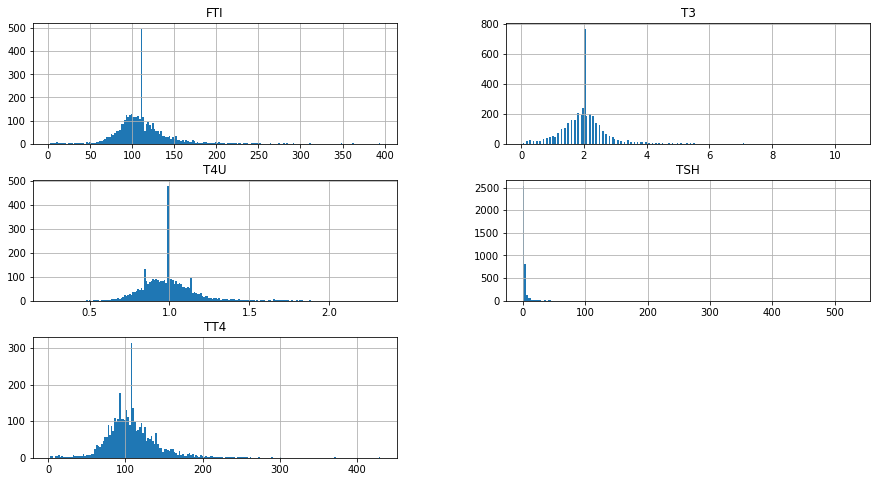

In [212]:
df[['TSH','T3','TT4','T4U','FTI']].hist(figsize = (15 , 8) , bins =200)

In [216]:
# Dropping Feature TSH since the data contains outliers and now normally distributed

df = df.drop('TSH' , axis = 1)

In [218]:
# Replacing categoris of sex features into numbers.

df['sex'] = df['sex'].replace('F' , '0')
df['sex'] = df['sex'].replace('M' , '1')

# Replacing Nan value in sex column with its mode ie. 0
df['sex'] = df['sex'].replace(np.nan , '0')

In [219]:
# Converting Object Dtype with Float

df['age'] = df['age'].astype(float)

# Replacing Nan value in age column with its mean

df['age'] = df['age'].replace(np.nan , df['age'].mean())


In [220]:
df.isnull().sum().sum()

0

Now Data set does not contain any NAN values

#### Handling Categorical Features.

In [21]:
for i in df.columns:
    if len(df[i].unique())==2:
        print(i)

sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medication
sick
pregnant
thyroid_surgery
I131_treatment
query_hypothyroid
query_hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
Class


In [221]:
df_new = df[['on_thyroxine',
'query_on_thyroxine',
'on_antithyroid_medication',
'sick',
'pregnant',
'thyroid_surgery',
'I131_treatment',
'query_hypothyroid',
'query_hyperthyroid',
'lithium',
'goitre',
'tumor',
'hypopituitary',
'psych']]

In [222]:
# Mapping ALl ['t' , 'f'] with ['0' , '1']

for i in df_new:
    if len(df_new[i].unique())==2:
        df_new[i] = df_new[i].map({'f': 0 , 't' : 1})

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [223]:
# Checking head of all mapped columns

df_new.head()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


All 't' and 'f' has been replaced with 0 and 1

In [224]:
# dropping columns which we mapped from main dataframe.

df = df.drop(df_new , axis = 1)

In [225]:
# concating  a new dataframe where we mapped categories with main dataframe

df = pd.concat([df , df_new] , axis = 1)

In [226]:
df.head()

,age,sex,T3,TT4,T4U,FTI,Class,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,41.0,0,2.500000,125.0,1.140000,109.000000,negative,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23.0,0,2.000000,102.0,0.995031,110.486326,negative,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46.0,1,2.013609,109.0,0.910000,120.000000,negative,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70.0,0,1.900000,175.0,0.995031,110.486326,negative,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70.0,0,1.200000,61.0,0.870000,70.000000,negative,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [227]:
# mapping categories of Target feature.

df['Class'] = df['Class'].map({'negative':'0' , 'primary_hypothyroid':'1'})

In [151]:
df.head()

,age,sex,TSH,T3,TT4,T4U,FTI,Class,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,41.0,0,1.30,2.5,125.0,1.14,109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23.0,0,4.10,2.0,102.0,0.98,107.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46.0,1,0.98,2.0,109.0,0.91,120.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70.0,0,0.16,1.9,175.0,0.98,107.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70.0,0,0.72,1.2,61.0,0.87,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


All categorical features has been converted to numrical features

In [228]:
# Finding out columns which have dtype as  object

df.select_dtypes(include = [object]).columns

Index(['sex', 'Class'], dtype='object')

In [229]:
# converting Dtype from object to float

df['sex']=df['sex'].astype(int)
df['Class']=df['Class'].astype(int)

Now all the features are in numerical form.

### Analysing whether dataset is imbalanced or not

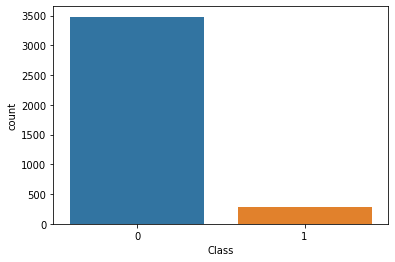

In [155]:
sns.countplot(df['Class'])

As per the observation, dataset is highly imbalaned.

Hence the Dataset needs to be converted to balanced dataset

In [230]:
# Filtering dataframe by clases

negative = df[df['Class'] == 0]
positive = df[df['Class'] == 1]

In [157]:
negative.shape

(3481, 22)

In [158]:
positive.shape

(289, 22)

In [231]:
# Dividing dataset into independant and dependant feature

x = df.drop('Class' ,  axis = 1)
y = df['Class']

In [233]:
# importing SMOTE

from imblearn.combine import SMOTETomek

In [234]:
# Applying over sampling

smk = SMOTETomek(random_state = 25)
x_res , y_res = smk.fit_sample(x,y)

In [235]:
x_res.shape

(6766, 20)

In [237]:
x_res.head()

,age,sex,T3,TT4,T4U,FTI,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych
0,41.0,0,2.500000,125.0,1.140000,109.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,46.0,1,2.013609,109.0,0.910000,120.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70.0,0,1.900000,175.0,0.995031,110.486326,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70.0,0,1.200000,61.0,0.870000,70.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18.0,0,2.013609,183.0,1.300000,141.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [238]:
y_res.value_counts()

1    3383
0    3383
Name: Class, dtype: int64

In [239]:
df = pd.concat([x_res , y_res] , axis = 1)

In [240]:
df['Class'].value_counts()

1    3383
0    3383
Name: Class, dtype: int64

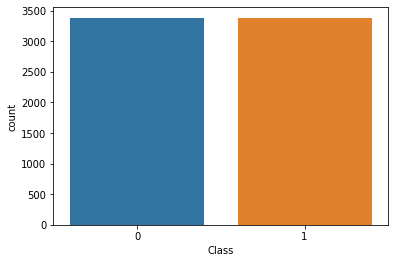

In [241]:
sns.countplot(df['Class'])

Now the Dataset is equally balanced

In [242]:
# Finding out continious features

df.select_dtypes(include = [float]).head()

,age,T3,TT4,T4U,FTI
0,41.0,2.500000,125.0,1.140000,109.000000
1,46.0,2.013609,109.0,0.910000,120.000000
2,70.0,1.900000,175.0,0.995031,110.486326
3,70.0,1.200000,61.0,0.870000,70.000000
4,18.0,2.013609,183.0,1.300000,141.000000


#### Analysing distribution of continious features

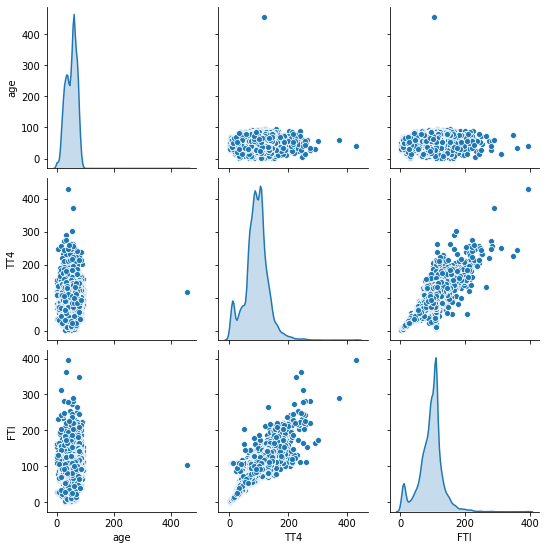

In [243]:
sns.pairplot(df[['age' , 'TT4' , 'FTI']] , diag_kind = 'kde')

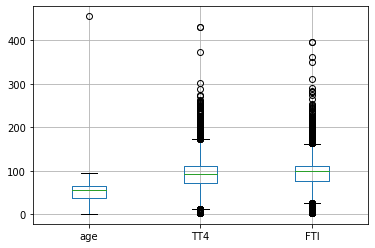

In [171]:
df[['age' , 'TT4' , 'FTI']].boxplot()

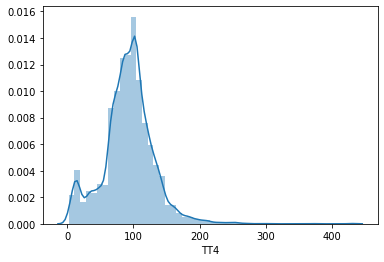

In [172]:
sns.distplot(df['TT4'])

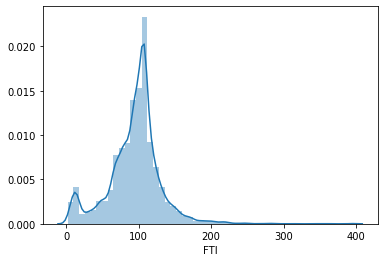

In [173]:
sns.distplot(df['FTI'])

#### Handling Outliers by using standard deviation

In [244]:
upper_limit = df.age.mean() + 3 * df.age.std()   
lower_limit = df.age.mean() - 3 * df.age.std()
df =df[(df.age < upper_limit) & (df.age > lower_limit)]

In [245]:
upper_limit = df.TT4.mean() + 3 * df.TT4.std()   
lower_limit = df.TT4.mean() - 3 * df.TT4.std()
df =df[(df.TT4 < upper_limit) & (df.TT4 > lower_limit)]

In [246]:
upper_limit = df.FTI.mean() + 3 * df.FTI.std()   
lower_limit = df.FTI.mean() - 3 * df.FTI.std()
df =df[(df.FTI < upper_limit) & (df.FTI > lower_limit)]

All the data points which are outside of the 3rd standard deviation are removed

In [247]:
df.shape

(6674, 21)

In [248]:
6954-6857

97

97 data points has been removed as an outlier

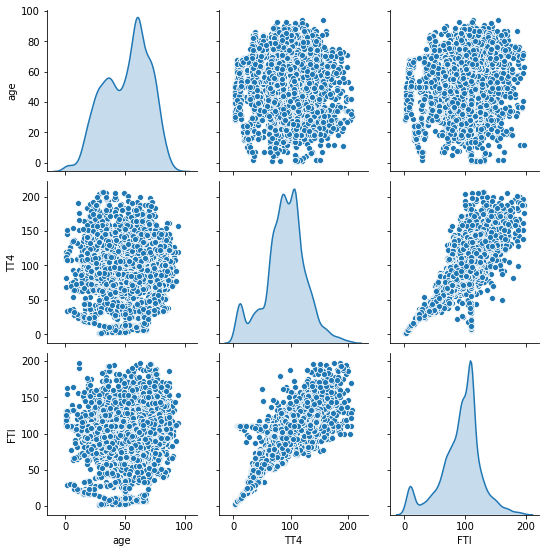

In [249]:
sns.pairplot(df[['age' , 'TT4' , 'FTI']] , diag_kind = 'kde')

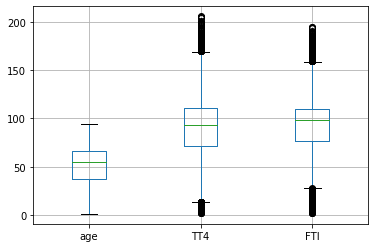

In [60]:
df[['age' , 'TT4' , 'FTI']].boxplot()

In [250]:
df.head()

,age,sex,T3,TT4,T4U,FTI,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,Class
0,41.0,0,2.500000,125.0,1.140000,109.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,46.0,1,2.013609,109.0,0.910000,120.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70.0,0,1.900000,175.0,0.995031,110.486326,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70.0,0,1.200000,61.0,0.870000,70.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18.0,0,2.013609,183.0,1.300000,141.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Finding out best feaures

#### Correlation heatmap

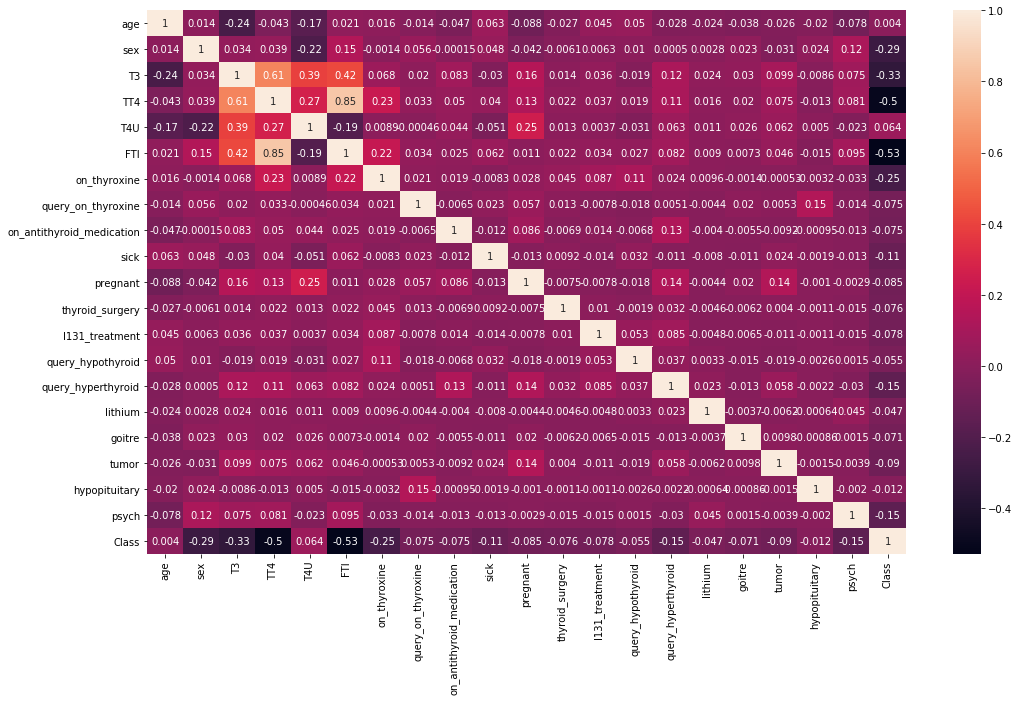

In [251]:
plt.figure(figsize = (17 , 10))
sns.heatmap(df.corr() , annot = True)

#### Select KBest feature selection technique

In [252]:
x = df.drop(['Class'] , axis = 1)
y = df.Class

In [254]:
from sklearn.feature_selection import SelectKBest , chi2

features = SelectKBest(score_func = chi2 ,  k = 20)

rank=features.fit(x,y)

dfscores = pd.DataFrame(rank.scores_ , columns=['scores'])

dfcolums = pd.DataFrame(x.columns)

final = pd.concat([dfscores , dfcolums] , axis = 1)

final.nlargest(20 , 'scores')

,scores,0
3,23195.723255,TT4
5,22728.212832,FTI
1,433.935490,sex
6,376.479442,on_thyroxine
2,189.878543,T3
19,152.987109,psych
14,148.672761,query_hyperthyroid
9,80.703098,sick
17,53.123623,tumor
10,48.313886,pregnant


TT4

FTI

sex

on_thyroxine

T3

query_hyperthyroid

psych

Sick

Tumor

Pregnant

#### Above mentioned features will be selected for prediction

In [255]:
x = df[['TT4' , 'FTI' , 'sex' , 'on_thyroxine' , 'T3' , 'query_hyperthyroid' , 'psych' , 'sick' , 'tumor' , 'pregnant']]
y = df.Class

In [256]:
x.head()

,TT4,FTI,sex,on_thyroxine,T3,query_hyperthyroid,psych,sick,tumor,pregnant
0,125.0,109.000000,0,0,2.500000,0,0,0,0,0
1,109.0,120.000000,1,0,2.013609,0,0,0,0,0
2,175.0,110.486326,0,1,1.900000,0,0,0,0,0
3,61.0,70.000000,0,0,1.200000,0,0,0,0,0
4,183.0,141.000000,0,1,2.013609,0,0,0,0,0


In [258]:
# Raw Data


#df = pd.concat([x , y] , axis = 1)

#df.to_csv("C://Users//admin//Desktop//Thyriod Detection//Data_Preprocessing//raw_data.csv", index = False)

## Data Standardization using StandardScaler

In [264]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
df = pd.DataFrame(x)
data = pd.concat([df , y] , axis = 1)

In [265]:
scaled_data.to_csv("C://Users//admin//Desktop//Thyriod Detection//Data_Preprocessing//scaled_data.csv", index = False)